In [20]:
import os
import sys
import subprocess

# Name your environment
venv_dir = "venv"

# Create venv
if not os.path.exists(venv_dir):
    print(f"Creating virtual environment in {venv_dir}...")
    subprocess.check_call([sys.executable, "-m", "venv", venv_dir])
else:
    print(f"Virtual environment {venv_dir} already exists.")

# Choose correct activation script based on OS
if os.name == "nt":  # Windows
    activate_script = os.path.join(venv_dir, "Scripts", "activate")
else:  # Unix/Linux/Mac
    activate_script = os.path.join(venv_dir, "bin", "activate")

print(f"✅ Venv setup done. Activate manually if needed: {activate_script}")

Virtual environment venv already exists.
✅ Venv setup done. Activate manually if needed: venv\Scripts\activate


In [21]:
import subprocess

# Define your requirements file
requirements_file = "requirements.txt"

# Check if requirements.txt exists
if not os.path.isfile(requirements_file):
    print(f"❌ {requirements_file} not found. Create it first.")
else:
    print(f"Installing from {requirements_file}...")
    
    # Find pip inside the venv
    pip_path = os.path.join(venv_dir, "bin", "pip") if os.name != "nt" else os.path.join(venv_dir, "Scripts", "pip.exe")
    
    # Use subprocess.run instead of check_call
    result = subprocess.run(
        [pip_path, "install", "-r", requirements_file],
        capture_output=True,
        text=True
    )

    # Always print the output
    print("--- stdout ---")
    print(result.stdout)
    print("--- stderr ---")
    print(result.stderr)

    # Check if pip succeeded
    if result.returncode != 0:
        raise Exception(f"❌ pip install failed with exit code {result.returncode}")
    else:
        print(f"✅ Installed requirements from {requirements_file}.")

Installing from requirements.txt...
--- stdout ---
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
  Using cached easyocr-1.7.2-py3-none-any.whl (2.9 MB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
  Using cached scikit_image-0.25.2-cp311-cp311-win_amd64.whl (12.8 MB)
  Using cached ninja-1.11.1.4-py3-none-win_amd64.whl (296 kB)
  Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)

--- stderr ---
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\rohan\\Downloads\\CS224R-proj\\venv\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Exception: ❌ pip install failed with exit code 1

frame     1: '800/800'


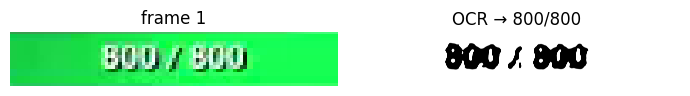

frame  1001: '800/800'


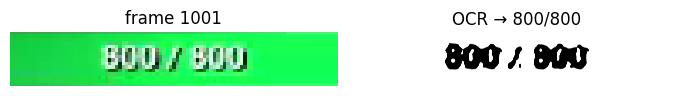

frame  2001: '174/881'


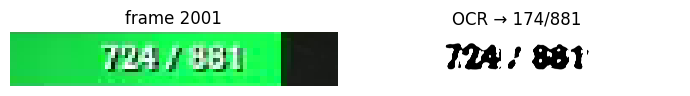

frame  3001: '435/881'


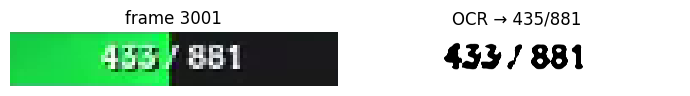

frame  4001: '42/884'


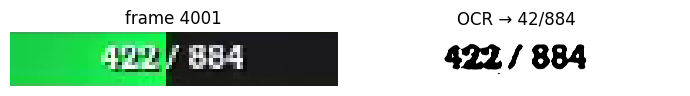

frame  5001: '211/968'


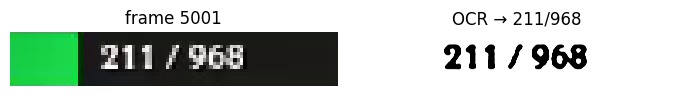

frame  6001: '835/971'


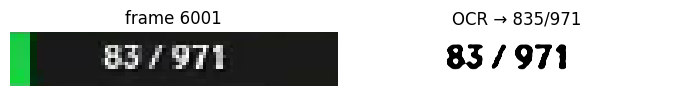

frame  7001: ''


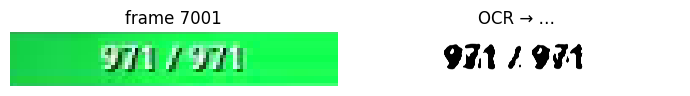

frame  8001: '941/91'


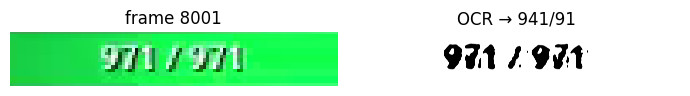

frame  9001: '10611/7001'


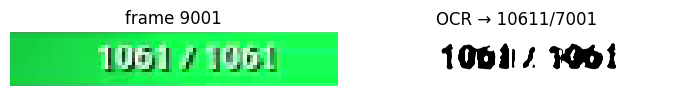

In [ ]:
import cv2, pytesseract, numpy as np, re, matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

ROI     = slice(-227, -211), slice(78, 175)
SCALE   = 100
CFG     = "--oem 3 --psm 7 -c tessedit_char_whitelist=0123456789/"
PAT     = re.compile(r"\d+/\d+")

def ocr_bar(bar_bgr, debug=False):
    big   = cv2.resize(bar_bgr, None, fx=SCALE, fy=SCALE, interpolation=cv2.INTER_CUBIC)
    blur  = cv2.GaussianBlur(big, (0, 0), 1.2)
    sharp = cv2.addWeighted(big, 1.5, blur, -0.5, 0)

    hsv   = cv2.cvtColor(sharp, cv2.COLOR_BGR2HSV)
    s, v  = hsv[:, :, 1], hsv[:, :, 2]
    mask  = ((s < 140) & (v > 120)).astype(np.uint8) * 255

    k     = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    mask  = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, k, 1)
    mask  = cv2.dilate(mask, k, 1)

    inv   = cv2.bitwise_not(mask)
    txt   = pytesseract.image_to_string(inv, config=CFG).strip()
    txt   = txt if PAT.fullmatch(txt) else ""
    return (txt, inv) if debug else txt

# --------------------------------------------------------------
cap = cv2.VideoCapture("replays/sample.mp4")

for fn in range(1, 10_001, 1_000):
    cap.set(cv2.CAP_PROP_POS_FRAMES, fn)
    ret, frame = cap.read();  assert ret

    bar = frame[ROI]
    text, dbg = ocr_bar(bar, debug=True)

    # --- NEW: print to console -----------------------------------
    print(f"frame {fn:5}: {text!r}")

    # --- visual debug (optional) ---------------------------------
    fig, ax = plt.subplots(1, 2, figsize=(7, 3))
    ax[0].imshow(cv2.cvtColor(bar, cv2.COLOR_BGR2RGB)); ax[0].set_title(f"frame {fn}")
    ax[0].axis("off")
    ax[1].imshow(dbg, cmap="gray");                    ax[1].set_title(f"OCR → {text or '…'}")
    ax[1].axis("off")
    plt.tight_layout(); plt.show()

cap.release()


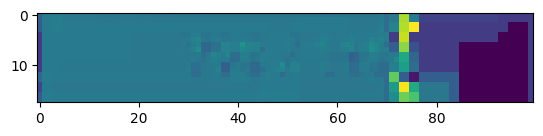

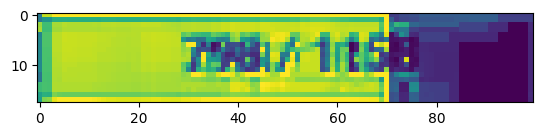

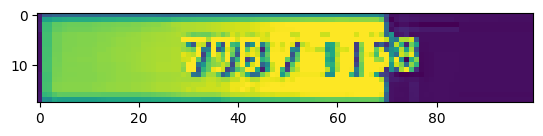

ee



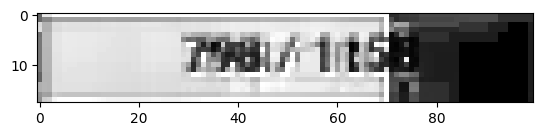

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

# Update the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the video
video_path = 'replays/sample.mp4'
video_capture = cv2.VideoCapture(video_path)

# Specify the frame number you want to extract
frame_number = 17000
#16000
# Set the video capture to the specific frame
video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
success, frame = video_capture.read()

frame = frame[-228:-210,75:175]
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:,:,0])
plt.show()
plt.imshow(hsv[:,:,1])
plt.show()
plt.imshow(hsv[:,:,2])
plt.show()
#CODE HERE
frame = hsv[:,:,1]
# Use Tesseract to extract text
text = pytesseract.image_to_string(frame, lang='eng',config='--oem 3 --psm 6')


print(text)

# Release the video capture object
video_capture.release()

plt.imshow(frame, cmap='gray')
plt.show()

In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

# Load the video
video_path = 'replays/sample.mp4'
video_capture = cv2.VideoCapture(video_path)

# Specify the frame number you want to extract
frame_number = 2000

# Set the video capture to the specific frame
video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

# Read the frame
success, frame = video_capture.read()
frame = frame[-152:-141,50:118,]
# Convert the image to grayscale
gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the image
result = reader.readtext(binary_image, detail=0)

# Print the recognized text
print("Recognized text:", result)

# Display the processed image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Image for OCR')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\rohan\Downloads\CS224R-proj\venv\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\rohan\Downloads\CS224R-proj\venv\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\rohan\Downloads\CS224R-proj\venv\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.sta

RuntimeError: Numpy is not available

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12,) + inhomogeneous part.

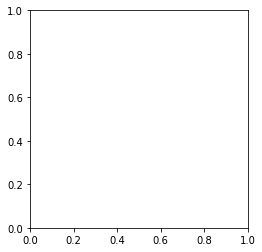

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

video_path = 'replays/sample.mp4'
video_capture = cv2.VideoCapture(video_path)

# Specify the frame numbers you want to extract
for i in range(1, 50000, 1000):
    frame_number = i
    # Set the video capture to the specific frame
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # Read the frame
    success, og_frame = video_capture.read()
    if not success:
        break
    og_frame = og_frame[-228:-210, 75:175]

    # Convert frame to HSV color space
    hsv_frame = cv2.cvtColor(og_frame, cv2.COLOR_BGR2HSV)

    # Define the green color range in HSV
    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])

    # Create a mask for the green background
    green_mask = cv2.inRange(hsv_frame, lower_green, upper_green)

    # Invert the mask to get the text
    text_mask = cv2.bitwise_not(green_mask)

    # Find contours of the text
    contours, _ = cv2.findContours(text_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    plt.imshow(contours)
    plt.show()

    # Initialize bounding box variables
    x, y, w, h = 0, 0, og_frame.shape[1], og_frame.shape[0]

    if contours:
        # Get the bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(contours[0])
        for contour in contours[1:]:
            new_x, new_y, new_w, new_h = cv2.boundingRect(contour)
            x = min(x, new_x)
            y = min(y, new_y)
            w = max(w, new_w)
            h = max(h, new_h)

    # Crop the frame to the bounding box
    cropped_frame = og_frame[y:y+h, x:x+w]

    # Display the cropped frame
    plt.imshow(cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Frame {frame_number}')
    plt.show()

# Release the video capture object
video_capture.release()
